Based on Jake VanderPlas talk Statistics for Hackers.

Our aim is to collect simple statistical methods that can be achieved without knowing of statistics.

* Direct simulation
* Shuffling
* Bootstrapping
* Cross validation

**TASK**: Is coin which shows 22 heads out of 30 throws fair?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from numpy.random import randint, shuffle, choice
from scipy.special import binom

In [2]:
T = []
n = 10000
for i in range(n):
    T.append(sum(randint(2, size = 30)))
print("Probability is {0}".format(sum(np.array(T) >= 22)/n))

Probability is 0.0095


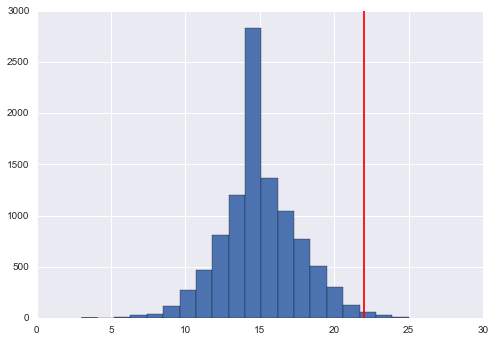

In [3]:
plt.hist(T, bins = 20)
plt.axvline(x = 22, color = 'red')
plt.show()

How accurate is simulation itself? Let's make many simulations and evaluate deviation from acctual analytical result.

In [4]:
b = 0
for i in range(22, 31):
    b += binom(30, i) * (1/2)**30
print(b)

0.00806240085512


In [5]:
P = []
for _ in range(100):
    T = []
    n = 10000
    for i in range(n):
        T.append(sum(randint(2, size = 30)))
    P.append(sum(np.array(T) >= 22)/n)

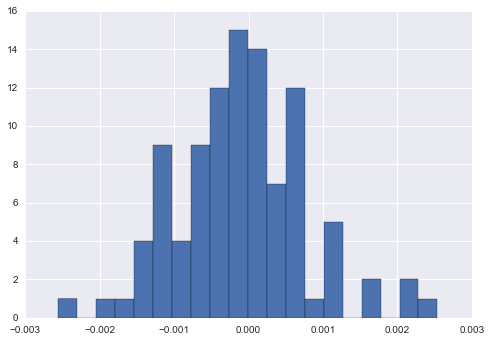

In [6]:
p = plt.hist(np.array(P) - b, bins = 20)

With 10000 expriments we get $0.008 \pm 0.0026$.

In [7]:
3*np.array(P).std()

0.0026434937109817381

In [8]:
randint?

## Relevance in test score differences (Shuffling)

**TASK** Are following groups different?

In [9]:
A = np.array([84, 72, 57, 46, 63, 76, 99, 91])
B = np.array([81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69])
concat = np.concatenate([A, B])

In [10]:
M = []
n = 10000
for i in range(n):
    shuffle(concat)
    M.append(concat[:A.shape[0]].mean() - concat[A.shape[0]:].mean())
print('Difference is {0}'.format(sum(np.array(M) > A.mean() - B.mean())/n))

Difference is 0.1549


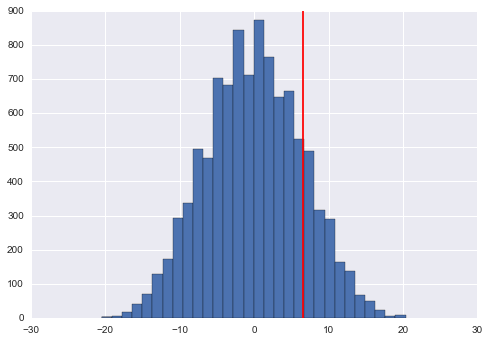

In [11]:
plt.hist(M, bins = 30)
plt.axvline(x = A.mean() - B.mean(), color = 'red')
plt.show()

It looks like the difference has much more likely occured by chance.

## Bootstrapping

In [12]:
A = np.array([48, 24, 51, 12, 21, 41, 25, 23, 32, 61, 
     19, 24, 29, 21, 23, 13, 32, 18, 42, 18])

In [13]:
M = np.array([])
n = 10000
for i in range(n):
    M = np.append(M, choice(A, len(A)).mean())

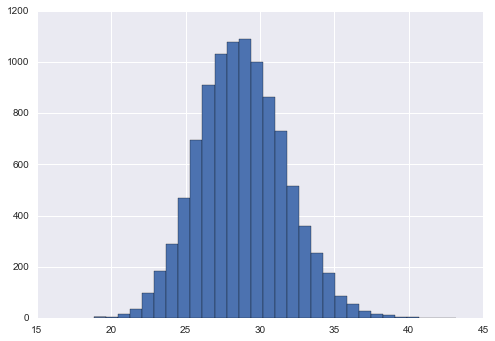

In [14]:
plt.hist(M, bins = 30)
plt.show()

In [15]:
print('Mean {0}, deviation {1}'.format(M.mean(), M.std()))

Mean 28.815569999999994, deviation 2.9168720532618497
